In [1]:
import os
import sys
import numpy as np
import pandas as pd
from copy import deepcopy

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
full_name = 'ChingisBadmaev'
random_state = sum(map(ord,full_name))

In [4]:
MLDATA_PATH = '/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_6_pca/moex_top.csv'

In [5]:
mldata = pd.read_csv(MLDATA_PATH, index_col=0)
returns_1 = mldata.pct_change().fillna(0)
returns_2 = (mldata / mldata.shift(1) - 1).fillna(0)

In [6]:
mldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2520 entries, 2012-01-03 to 2021-12-30
Data columns (total 78 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AFKS    2520 non-null   float64
 1   AFLT    2520 non-null   float64
 2   AKRN    2520 non-null   float64
 3   ALRS    2520 non-null   float64
 4   AMEZ    2501 non-null   float64
 5   APTK    2519 non-null   float64
 6   BANE    2511 non-null   float64
 7   BANEP   2511 non-null   float64
 8   BLNG    2520 non-null   float64
 9   BSPB    2520 non-null   float64
 10  CHMF    2520 non-null   float64
 11  CHMK    2507 non-null   float64
 12  DIOD    2477 non-null   float64
 13  DVEC    2462 non-null   float64
 14  FEES    2520 non-null   float64
 15  FESH    2520 non-null   float64
 16  GAZP    2520 non-null   float64
 17  GCHE    2511 non-null   float64
 18  GMKN    2520 non-null   float64
 19  HYDR    2520 non-null   float64
 20  IRAO    2502 non-null   float64
 21  IRKT    2519 non-null   flo

Пусть вместо Nan стоит ближайшая не Nan цена    
Вместо того, чтобы исправлять сами данные, будем исправлять return`s (returns = 0)

Point (a)

In [7]:
def get_point_a(returns):
    pca = PCA(n_components=2).fit(returns.T)
    transformed = pca.transform(returns.T)
    transformed = transformed[transformed[:,:2].max(axis=1)<10]

    fix,ax = plt.subplots(1,2,figsize=(20,6))
    ax[0].scatter(transformed[:,0],transformed[:,1],s=5)
    ax[1].plot(pca.explained_variance_ratio_)

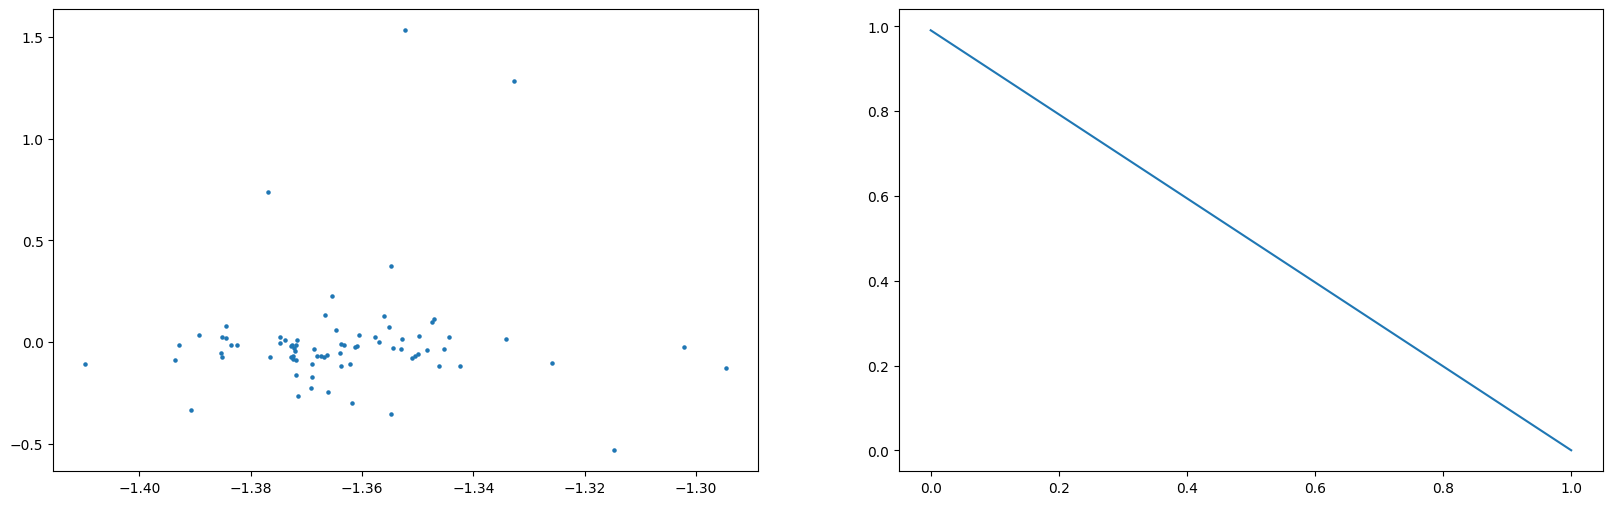

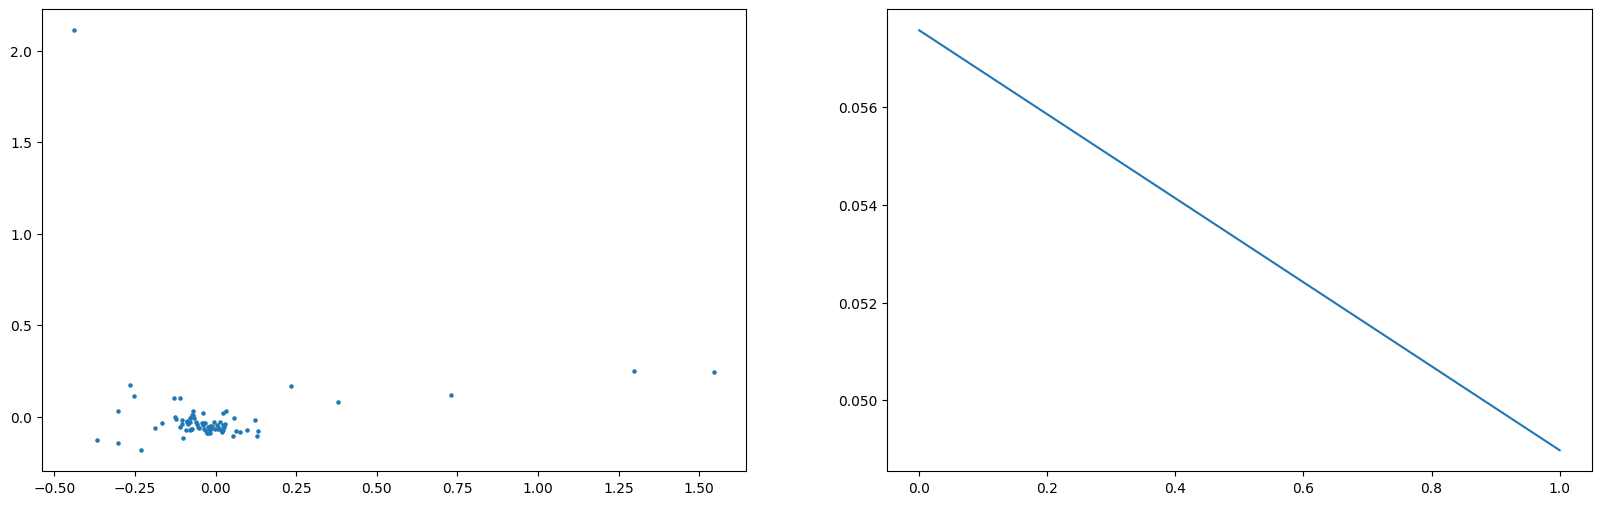

In [9]:
get_point_a(returns=returns_1)
get_point_a(returns=returns_2)

Point (b)

In [31]:
def get_point_b(returns):
    tsne = TSNE(n_components=2,perplexity=1,random_state=random_state)
    transformed = tsne.fit_transform(returns.T)
    plt.scatter(transformed[:,0],transformed[:,1],s=2)

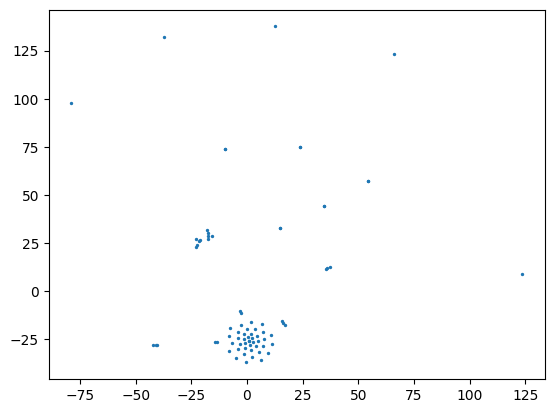

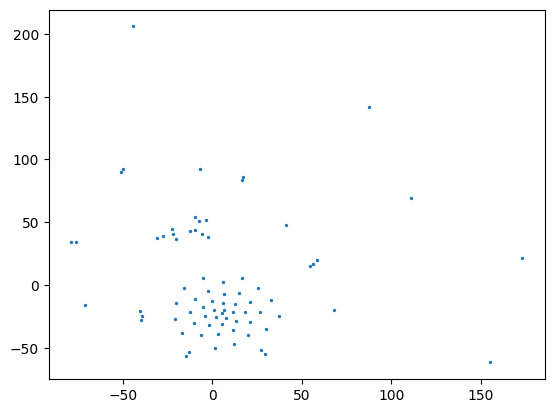

In [32]:
get_point_b(returns = returns_1)
plt.show()
get_point_b(returns = returns_2)

Исследуем, почему получились различные графики

In [9]:
a = (mldata / mldata.shift(1) - 1).fillna(0)
b = mldata.pct_change().fillna(0)

In [10]:
(a == b).sum(axis=1)

date
2012-01-03    78
2012-01-04    78
2012-01-05    78
2012-01-06    78
2012-01-09    77
              ..
2021-12-24    78
2021-12-27    78
2021-12-28    78
2021-12-29    78
2021-12-30    78
Length: 2520, dtype: int64

In [11]:
temp = (a.loc['2012-01-09'] == b.loc['2012-01-09'])
for i in range(78):
    if temp[i] == False:
        print(i)

57


In [12]:
a.columns = range(len(a.columns))

In [13]:
print(a.loc['2012-01-09'][57])
print(b.loc['2012-01-09'][57])

0.0
0.014319809069212486


In [14]:
mldata.columns = range(len(mldata.columns))
temp = mldata.loc['2012-01-04':'2012-01-15'][57]
temp

date
2012-01-04    63.00
2012-01-05    62.85
2012-01-06      NaN
2012-01-09    63.75
2012-01-10    64.00
2012-01-11    65.22
2012-01-12    65.25
2012-01-13    66.00
Name: 57, dtype: float64

In [15]:
63.75 / 62.85 - 1

0.014319809069212486

Итого pct_change и способ через shift(1) работают по-разному